In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime

In [7]:
data = pd.read_csv('hw2_data.csv', parse_dates = True, index_col = 0)

In [8]:
data

,I_US,I_EU,Inf_US,Inf_EU,Euro
2003-12-01,1.11,2.1590,0.019284,0.021933,1.196501
2004-01-01,1.10,2.1463,0.020352,0.020207,1.258194
2004-02-01,1.06,2.0895,0.020263,0.018343,1.246805
2004-03-01,1.05,2.0706,0.016885,0.016654,1.244803
2004-04-01,1.05,2.0288,0.017401,0.017175,1.236507
...,...,...,...,...,...
2022-08-01,2.50,0.0366,0.084821,0.088662,1.020825
2022-09-01,2.76,0.3947,0.082492,0.091406,1.003905
2022-10-01,3.21,1.0109,0.082224,0.099272,0.982956
2022-11-01,3.85,1.4277,0.077631,0.106206,0.988631


In [22]:
#1.(a)
def scale(x):
    return (x-x.min())/(x.max()-x.min())

# Apply Scaling
data["ir_diff"] = scale(data["I_US"]) - scale(data["I_EU"])
data

,I_US,I_EU,Inf_US,Inf_EU,Euro,ir_diff,Filter,Filter Error,std,Upper,Lower,test
2003-12-01,1.11,2.1590,0.019284,0.021933,1.196501,-0.292402,-0.292402,0.000000,NaN,NaN,NaN,0.0
2004-01-01,1.10,2.1463,0.020352,0.020207,1.258194,-0.292024,-0.292383,0.000359,NaN,NaN,NaN,0.0
2004-02-01,1.06,2.0895,0.020263,0.018343,1.246805,-0.289458,-0.292237,0.002779,NaN,NaN,NaN,0.0
2004-03-01,1.05,2.0706,0.016885,0.016654,1.244803,-0.287991,-0.292025,0.004034,NaN,NaN,NaN,0.0
2004-04-01,1.05,2.0288,0.017401,0.017175,1.236507,-0.280651,-0.291456,0.010805,0.004365,-0.291456,-0.291456,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2.50,0.0366,0.084821,0.088662,1.020825,0.337677,0.112756,0.224920,0.086017,0.112756,0.112756,-1.0
2022-09-01,2.76,0.3947,0.082492,0.091406,1.003905,0.322946,0.123266,0.199681,0.074709,0.123266,0.123266,-1.0
2022-10-01,3.21,1.0109,0.082224,0.099272,0.982956,0.298081,0.132006,0.166075,0.045712,0.132006,0.132006,-1.0
2022-11-01,3.85,1.4277,0.077631,0.106206,0.988631,0.343414,0.142577,0.200837,0.024720,0.142577,0.142577,-1.0


In [23]:
#1.(b)
k = 0.05
w = 5
z = 0

data["Filter"] = data.ir_diff.ewm(alpha = k, adjust = False).mean()

# Compute the filter error
data["Filter Error"] = data.ir_diff - data["Filter"]

data

,I_US,I_EU,Inf_US,Inf_EU,Euro,ir_diff,Filter,Filter Error,std,Upper,Lower,test
2003-12-01,1.11,2.1590,0.019284,0.021933,1.196501,-0.292402,-0.292402,0.000000,NaN,NaN,NaN,0.0
2004-01-01,1.10,2.1463,0.020352,0.020207,1.258194,-0.292024,-0.292383,0.000359,NaN,NaN,NaN,0.0
2004-02-01,1.06,2.0895,0.020263,0.018343,1.246805,-0.289458,-0.292237,0.002779,NaN,NaN,NaN,0.0
2004-03-01,1.05,2.0706,0.016885,0.016654,1.244803,-0.287991,-0.292025,0.004034,NaN,NaN,NaN,0.0
2004-04-01,1.05,2.0288,0.017401,0.017175,1.236507,-0.280651,-0.291456,0.010805,0.004365,-0.291456,-0.291456,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2.50,0.0366,0.084821,0.088662,1.020825,0.337677,0.112756,0.224920,0.086017,0.112756,0.112756,-1.0
2022-09-01,2.76,0.3947,0.082492,0.091406,1.003905,0.322946,0.123266,0.199681,0.074709,0.123266,0.123266,-1.0
2022-10-01,3.21,1.0109,0.082224,0.099272,0.982956,0.298081,0.132006,0.166075,0.045712,0.132006,0.132006,-1.0
2022-11-01,3.85,1.4277,0.077631,0.106206,0.988631,0.343414,0.142577,0.200837,0.024720,0.142577,0.142577,-1.0


In [24]:
#1.(c)

# compute the rolling standard deviation
data["std"] = data["Filter Error"].rolling(w).std()

# create our confidence intervals or "boundaries of inaction"
# these are scaled by the number of standard deviations "z"
data["Upper"] = data["Filter"] + z*data["std"]
data["Lower"] = data["Filter"] - z*data["std"]

# Create signal that evaluates whether we are outside the threshold
# then multiply by the direction of the mistake
# (we use economic theory to decide which direction is long or short)
data["test"] = np.where(data["Filter Error"].abs()>z*data["std"], -1, 0)*np.sign(data["Filter Error"])

data

,I_US,I_EU,Inf_US,Inf_EU,Euro,ir_diff,Filter,Filter Error,std,Upper,Lower,test
2003-12-01,1.11,2.1590,0.019284,0.021933,1.196501,-0.292402,-0.292402,0.000000,NaN,NaN,NaN,0.0
2004-01-01,1.10,2.1463,0.020352,0.020207,1.258194,-0.292024,-0.292383,0.000359,NaN,NaN,NaN,0.0
2004-02-01,1.06,2.0895,0.020263,0.018343,1.246805,-0.289458,-0.292237,0.002779,NaN,NaN,NaN,0.0
2004-03-01,1.05,2.0706,0.016885,0.016654,1.244803,-0.287991,-0.292025,0.004034,NaN,NaN,NaN,0.0
2004-04-01,1.05,2.0288,0.017401,0.017175,1.236507,-0.280651,-0.291456,0.010805,0.004365,-0.291456,-0.291456,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2.50,0.0366,0.084821,0.088662,1.020825,0.337677,0.112756,0.224920,0.086017,0.112756,0.112756,-1.0
2022-09-01,2.76,0.3947,0.082492,0.091406,1.003905,0.322946,0.123266,0.199681,0.074709,0.123266,0.123266,-1.0
2022-10-01,3.21,1.0109,0.082224,0.099272,0.982956,0.298081,0.132006,0.166075,0.045712,0.132006,0.132006,-1.0
2022-11-01,3.85,1.4277,0.077631,0.106206,0.988631,0.343414,0.142577,0.200837,0.024720,0.142577,0.142577,-1.0


In [55]:
#2.(a)
# Create a dataframe at a daily frequency with start and end 
# dates that cover the observation period
drange = pd.date_range(start =data.index[0], end = "01/01/2023")
daily  = pd.DataFrame(index = drange)

# Integrate the monthly dta into the daily data
daily["test"] = data["test"]

daily["Upper"] = data["Upper"]
daily["Lower"] = data["Lower"]
daily["Filter"] = data["Filter"]
daily["ir_diff"] = data["ir_diff"]

# Fill NA values with the last available value
daily["Upper"] = daily["Upper"].ffill()
daily["Lower"] = daily["Lower"].ffill()
daily["Filter"] = daily["Filter"].ffill()
daily["ir_diff"] = daily["ir_diff"].ffill()

# fill the remaining NA values with 0's
# also populates the test column
daily = daily.fillna(0)
daily

,test,Upper,Lower,Filter,ir_diff
2003-12-01,0.0,0.000000,0.000000,-0.292402,-0.292402
2003-12-02,0.0,0.000000,0.000000,-0.292402,-0.292402
2003-12-03,0.0,0.000000,0.000000,-0.292402,-0.292402
2003-12-04,0.0,0.000000,0.000000,-0.292402,-0.292402
2003-12-05,0.0,0.000000,0.000000,-0.292402,-0.292402
...,...,...,...,...,...
2022-12-28,0.0,0.154777,0.154777,0.154777,0.386580
2022-12-29,0.0,0.154777,0.154777,0.154777,0.386580
2022-12-30,0.0,0.154777,0.154777,0.154777,0.386580
2022-12-31,0.0,0.154777,0.154777,0.154777,0.386580


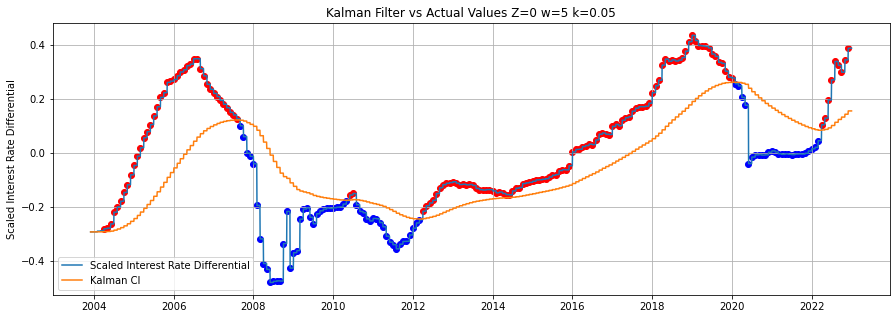

In [56]:
data2 = daily.dropna()
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Scaled Interest Rate Differential")

# Plot the actual series and the filter
ax.plot(data2["ir_diff"])
ax.plot(data2["Filter"])

# This code block is used to add confidence intervals when z > 0
#ax.fill_between(data2.index, data2.Lower, data2.Upper, color='b', alpha=.2)

# add scatterplots using boolean indexing
# We change the colors and shapes based on the conditions
ax.scatter(data2[data2.test == 1].index, data2[data2.test == 1]["ir_diff"], color = "blue")
ax.scatter(data2[data2.test == -1].index, data2[data2.test == -1]["ir_diff"], color = "red")
ax.legend(["Scaled Interest Rate Differential", "Kalman CI"])

# this code can let us zoom in on certain time periods
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
ax.grid()

In this strategy, we will go short when we are above the filter and boundaries and go long if we are below them.

In [57]:
#2.(b)
# We let the holding period (i) be 41 days
i = 41

# create a new column that we will populate with our daily position
daily.loc[:, str(i)+"_signal"] = 0

# loop through each day in the dataset
for j in daily.index:
    # If our monthly signal is not 0
    if daily.loc[j, "test"] != 0:
        # Make the next i days equal to the monthly signal
        daily.loc[j:j+datetime.timedelta(i), str(i)+"_signal"] = daily.loc[j, "test"]

In [58]:
# below we add the data to the daily df
currency = "EURUSD=X"
exrate = yf.download(currency)[["Adj Close"]].copy()

drange = pd.date_range(start =data.index[0], end = "01/01/2023")
exdf = pd.DataFrame(index = drange)

exrate.index = exrate.index.tz_localize(None)
exdf["EURUSD"] = exrate

exdf["EURUSD"] = exdf["EURUSD"].ffill()

daily["EURUSD"] = exdf["EURUSD"]
daily["Returns"] = np.log(daily["EURUSD"]).diff()

daily

[*********************100%***********************]  1 of 1 completed


,test,Upper,Lower,Filter,ir_diff,41_signal,EURUSD,Returns
2003-12-01,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.196501,NaN
2003-12-02,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.208897,0.010307
2003-12-03,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.212298,0.002809
2003-12-04,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.208094,-0.003473
2003-12-05,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.218695,0.008736
...,...,...,...,...,...,...,...,...
2022-12-28,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.063717,-0.000287
2022-12-29,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.062925,-0.000744
2022-12-30,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.066075,0.002959
2022-12-31,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.066075,0.000000


In [59]:
# calculate the cumulative returns for the current strategy
i = 41
daily[str(i)+"_returns"] = np.exp((daily[str(i)+"_signal"].shift()*daily.Returns).cumsum())-1

daily

,test,Upper,Lower,Filter,ir_diff,41_signal,EURUSD,Returns,41_returns
2003-12-01,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.196501,NaN,NaN
2003-12-02,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.208897,0.010307,0.000000
2003-12-03,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.212298,0.002809,0.000000
2003-12-04,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.208094,-0.003473,0.000000
2003-12-05,0.0,0.000000,0.000000,-0.292402,-0.292402,0,1.218695,0.008736,0.000000
...,...,...,...,...,...,...,...,...,...
2022-12-28,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.063717,-0.000287,-0.017812
2022-12-29,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.062925,-0.000744,-0.017080
2022-12-30,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.066075,0.002959,-0.019985
2022-12-31,0.0,0.154777,0.154777,0.154777,0.386580,-1,1.066075,0.000000,-0.019985


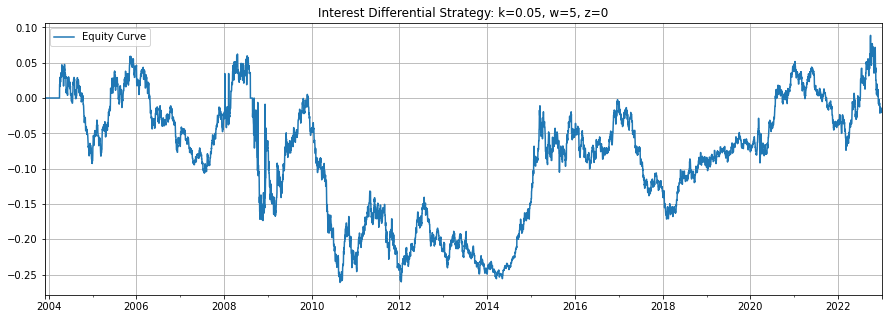

In [60]:
plt.figure(figsize = (15, 5))
d2 = daily[daily.index.year >= 2020]
(daily["41_returns"].dropna()).plot()

plt.title("Interest Differential Strategy:"+ " k=" + str(k)+", w="+str(w)+", z="+str(z))
plt.legend(["Equity Curve", "Long Success", "Long Fail", "Short Success", "Short Fail"])

plt.grid()
#plt.xlim(["1/1/2019", "1/1/2022"])

In [62]:
#2.(c)
start = daily[["EURUSD", '41_returns', "41_signal"]][123:].index[0]

df = daily[daily.test != 0][["41_signal", "EURUSD"]].copy()
df['D'] = df["41_signal"]

df = df[:-2].copy()

df = df[:-2].copy()
df['s_current'] = daily[daily.index.isin(df.index)]["EURUSD"].values
df['s_future'] = daily[daily.index.isin(df.index+datetime.timedelta(41))]["EURUSD"].values


# Get the realized exchange rate
df['R'] = np.where(df['s_future'] >= df['s_current'], 1, -1)

## Sample Covariance
df['W'] = (df['D']-np.mean(df['D']))*(df['R']-np.mean(df['R']))
T_B = np.mean(df['W'])

T_B

-0.0290739337851396

The sample covariance is pretty close to zero, so unlikely to reject.

In [63]:
## Newey-West LRV estimator
dy = df['W'] - np.mean(df['W'])
gamma_0 = sum((dy)**2)/len(df)
gamma_1 = np.mean((dy*dy.shift(-1))[:len(df)-1])
LRV = gamma_0 + 2*(1-1/2)*gamma_1

In [64]:
## Test-statistic
from scipy.stats import norm

statistic = T_B/np.sqrt(LRV/df.shape[0])
print('Test statistic : ', statistic, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  -0.4065592841023018 , 5 % critical value :  1.64


We fail to reject. So the strategy does not pass the binomial test.

In [65]:
# Weighted Mean
df['W_2'] = df['D']*(df['s_future']-df['s_current'])
T_WB = np.mean(df['W_2'])

## Newey-West LRV estimator
dy_2 = df['W_2'] - np.mean(df['W_2'])
gamma_0 = sum((dy_2)**2)/len(df)
gamma_1 = np.mean((dy_2*dy_2.shift(-1))[:len(df)-1])
LRV_2 = gamma_0 + 2*(1-1/2)*gamma_1

## Test-statistic
statistic_2 = T_WB/np.sqrt(LRV_2/len(df))
print('Test statistic : ', statistic_2, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  -0.4314829778028828 , 5 % critical value :  1.64


We fail to reject. So the strategy does not pass the weighted directional test.

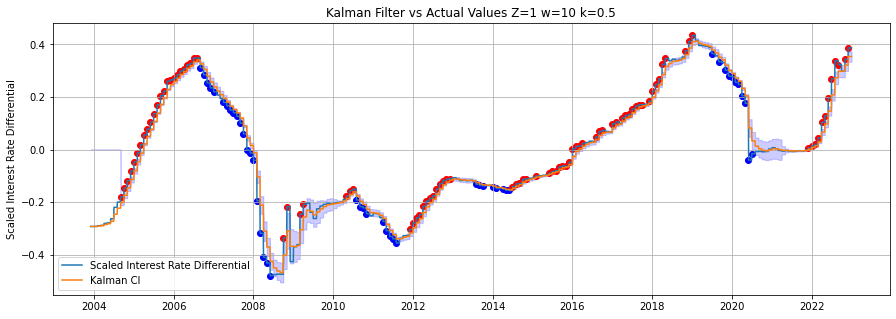

In [75]:
#2.(d)
#k=0.5, w=10, z=1
data=pd.read_csv('hw2_data.csv', parse_dates = True, index_col = 0)
k=0.5
w=10
z=1

data["ir_diff"] = scale(data["I_US"]) - scale(data["I_EU"])
    
data["Filter"] = data.ir_diff.ewm(alpha = k, adjust = False).mean()

# Compute the filter error
data["Filter Error"] = data.ir_diff - data["Filter"]

data["std"] = data["Filter Error"].rolling(w).std()

# create our confidence intervals or "boundaries of inaction"
# these are scaled by the number of standard deviations "z"
data["Upper"] = data["Filter"] + z*data["std"]
data["Lower"] = data["Filter"] - z*data["std"]

# Create signal that evaluates whether we are outside the threshold
# then multiply by the direction of the mistake
# (we use economic theory to decide which direction is long or short)
data["test"] = np.where(data["Filter Error"].abs()>z*data["std"], -1, 0)*np.sign(data["Filter Error"])
    
# Create a dataframe at a daily frequency with start and end 
# dates that cover the observation period
drange = pd.date_range(start =data.index[0], end = "01/01/2023")
daily  = pd.DataFrame(index = drange)

# Integrate the monthly dta into the daily data
daily["test"] = data["test"]

daily["Upper"] = data["Upper"]
daily["Lower"] = data["Lower"]
daily["Filter"] = data["Filter"]
daily["ir_diff"] = data["ir_diff"]

# Fill NA values with the last available value
daily["Upper"] = daily["Upper"].ffill()
daily["Lower"] = daily["Lower"].ffill()
daily["Filter"] = daily["Filter"].ffill()
daily["ir_diff"] = daily["ir_diff"].ffill()

# fill the remaining NA values with 0's
# also populates the test column
daily = daily.fillna(0)
    
data2 = daily.dropna()

fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Scaled Interest Rate Differential")

# Plot the actual series and the filter
ax.plot(data2["ir_diff"])
ax.plot(data2["Filter"])

# This code block is used to add confidence intervals when z > 0
ax.fill_between(data2.index, data2.Lower, data2.Upper, color='b', alpha=.2)

# add scatterplots using boolean indexing
# We change the colors and shapes based on the conditions
ax.scatter(data2[data2.test == 1].index, data2[data2.test == 1]["ir_diff"], color = "blue")
ax.scatter(data2[data2.test == -1].index, data2[data2.test == -1]["ir_diff"], color = "red")
ax.legend(["Scaled Interest Rate Differential", "Kalman CI"])

# this code can let us zoom in on certain time periods
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
ax.grid()


[*********************100%***********************]  1 of 1 completed


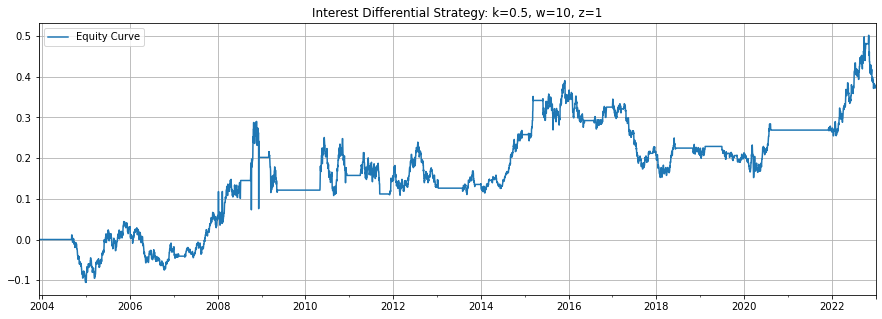

In [71]:
i = 41

# create a new column that we will populate with our daily position
daily.loc[:, str(i)+"_signal"] = 0

# loop through each day in the dataset
for j in daily.index:
    # If our monthly signal is not 0
    if daily.loc[j, "test"] != 0:
        # Make the next i days equal to the monthly signal
        daily.loc[j:j+datetime.timedelta(i), str(i)+"_signal"] = daily.loc[j, "test"]

# below we add the data to the daily df
currency = "EURUSD=X"
exrate = yf.download(currency)[["Adj Close"]].copy()

drange = pd.date_range(start =data.index[0], end = "01/01/2023")
exdf = pd.DataFrame(index = drange)

exrate.index = exrate.index.tz_localize(None)
exdf["EURUSD"] = exrate

exdf["EURUSD"] = exdf["EURUSD"].ffill()

daily["EURUSD"] = exdf["EURUSD"]
daily["Returns"] = np.log(daily["EURUSD"]).diff()

# calculate the cumulative returns for the current strategy
i = 41
daily[str(i)+"_returns"] = np.exp((daily[str(i)+"_signal"].shift()*daily.Returns).cumsum())-1

plt.figure(figsize = (15, 5))
d2 = daily[daily.index.year >= 2020]
(daily["41_returns"].dropna()).plot()

plt.title("Interest Differential Strategy:"+ " k=" + str(k)+", w="+str(w)+", z="+str(z))
plt.legend(["Equity Curve", "Long Success", "Long Fail", "Short Success", "Short Fail"])

plt.grid()
#plt.xlim(["1/1/2019", "1/1/2022"])

In [72]:
start = daily[["EURUSD", '41_returns', "41_signal"]][123:].index[0]

df = daily[daily.test != 0][["41_signal", "EURUSD"]].copy()
df['D'] = df["41_signal"]

df = df[:-2].copy()

df = df[:-2].copy()
df['s_current'] = daily[daily.index.isin(df.index)]["EURUSD"].values
df['s_future'] = daily[daily.index.isin(df.index+datetime.timedelta(41))]["EURUSD"].values


# Get the realized exchange rate
df['R'] = np.where(df['s_future'] >= df['s_current'], 1, -1)

## Sample Covariance
df['W'] = (df['D']-np.mean(df['D']))*(df['R']-np.mean(df['R']))
T_B = np.mean(df['W'])

dy = df['W'] - np.mean(df['W'])
gamma_0 = sum((dy)**2)/len(df)
gamma_1 = np.mean((dy*dy.shift(-1))[:len(df)-1])
LRV = gamma_0 + 2*(1-1/2)*gamma_1

from scipy.stats import norm

statistic = T_B/np.sqrt(LRV/df.shape[0])
print('Test statistic : ', statistic, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  -0.12298725487174011 , 5 % critical value :  1.64


In [73]:
# Weighted Mean
df['W_2'] = df['D']*(df['s_future']-df['s_current'])
T_WB = np.mean(df['W_2'])

## Newey-West LRV estimator
dy_2 = df['W_2'] - np.mean(df['W_2'])
gamma_0 = sum((dy_2)**2)/len(df)
gamma_1 = np.mean((dy_2*dy_2.shift(-1))[:len(df)-1])
LRV_2 = gamma_0 + 2*(1-1/2)*gamma_1

## Test-statistic
statistic_2 = T_WB/np.sqrt(LRV_2/len(df))
print('Test statistic : ', statistic_2, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  0.9776830710820564 , 5 % critical value :  1.64


We can see that changing to k=0.5, w=10, z=1 can improve the performance of our strategy. Although the strategy still doesn't pass the two tests, the return is much higher.

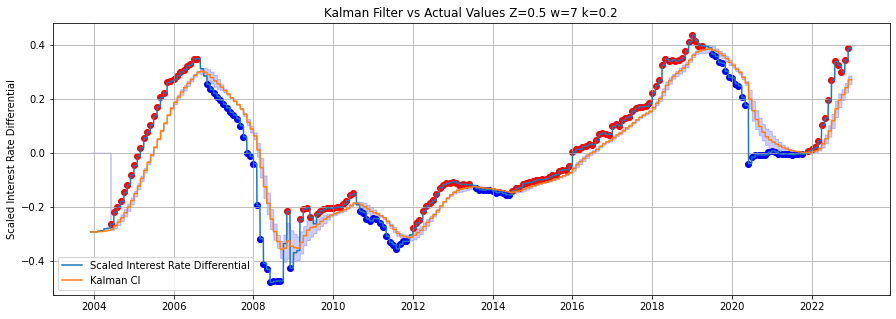

In [76]:
#k=0.2, w=7, z=0.5
data=pd.read_csv('hw2_data.csv', parse_dates = True, index_col = 0)
k=0.2
w=7
z=0.5

data["ir_diff"] = scale(data["I_US"]) - scale(data["I_EU"])
    
data["Filter"] = data.ir_diff.ewm(alpha = k, adjust = False).mean()

# Compute the filter error
data["Filter Error"] = data.ir_diff - data["Filter"]

data["std"] = data["Filter Error"].rolling(w).std()

# create our confidence intervals or "boundaries of inaction"
# these are scaled by the number of standard deviations "z"
data["Upper"] = data["Filter"] + z*data["std"]
data["Lower"] = data["Filter"] - z*data["std"]

# Create signal that evaluates whether we are outside the threshold
# then multiply by the direction of the mistake
# (we use economic theory to decide which direction is long or short)
data["test"] = np.where(data["Filter Error"].abs()>z*data["std"], -1, 0)*np.sign(data["Filter Error"])
    
# Create a dataframe at a daily frequency with start and end 
# dates that cover the observation period
drange = pd.date_range(start =data.index[0], end = "01/01/2023")
daily  = pd.DataFrame(index = drange)

# Integrate the monthly dta into the daily data
daily["test"] = data["test"]

daily["Upper"] = data["Upper"]
daily["Lower"] = data["Lower"]
daily["Filter"] = data["Filter"]
daily["ir_diff"] = data["ir_diff"]

# Fill NA values with the last available value
daily["Upper"] = daily["Upper"].ffill()
daily["Lower"] = daily["Lower"].ffill()
daily["Filter"] = daily["Filter"].ffill()
daily["ir_diff"] = daily["ir_diff"].ffill()

# fill the remaining NA values with 0's
# also populates the test column
daily = daily.fillna(0)
    
data2 = daily.dropna()

fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Scaled Interest Rate Differential")

# Plot the actual series and the filter
ax.plot(data2["ir_diff"])
ax.plot(data2["Filter"])

# This code block is used to add confidence intervals when z > 0
ax.fill_between(data2.index, data2.Lower, data2.Upper, color='b', alpha=.2)

# add scatterplots using boolean indexing
# We change the colors and shapes based on the conditions
ax.scatter(data2[data2.test == 1].index, data2[data2.test == 1]["ir_diff"], color = "blue")
ax.scatter(data2[data2.test == -1].index, data2[data2.test == -1]["ir_diff"], color = "red")
ax.legend(["Scaled Interest Rate Differential", "Kalman CI"])

# this code can let us zoom in on certain time periods
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
ax.grid()


[*********************100%***********************]  1 of 1 completed


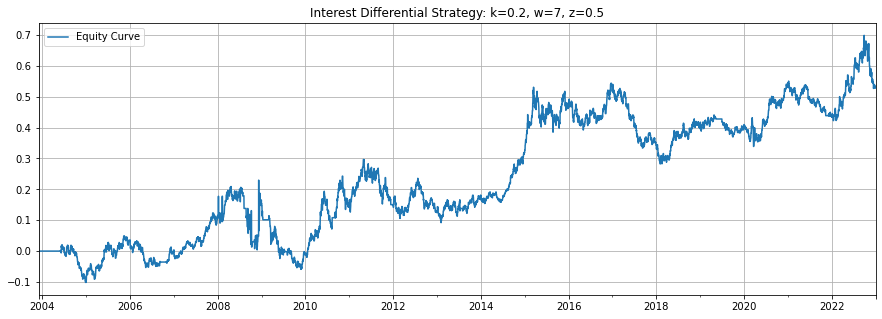

In [77]:
i = 41

# create a new column that we will populate with our daily position
daily.loc[:, str(i)+"_signal"] = 0

# loop through each day in the dataset
for j in daily.index:
    # If our monthly signal is not 0
    if daily.loc[j, "test"] != 0:
        # Make the next i days equal to the monthly signal
        daily.loc[j:j+datetime.timedelta(i), str(i)+"_signal"] = daily.loc[j, "test"]

# below we add the data to the daily df
currency = "EURUSD=X"
exrate = yf.download(currency)[["Adj Close"]].copy()

drange = pd.date_range(start =data.index[0], end = "01/01/2023")
exdf = pd.DataFrame(index = drange)

exrate.index = exrate.index.tz_localize(None)
exdf["EURUSD"] = exrate

exdf["EURUSD"] = exdf["EURUSD"].ffill()

daily["EURUSD"] = exdf["EURUSD"]
daily["Returns"] = np.log(daily["EURUSD"]).diff()

# calculate the cumulative returns for the current strategy
i = 41
daily[str(i)+"_returns"] = np.exp((daily[str(i)+"_signal"].shift()*daily.Returns).cumsum())-1

plt.figure(figsize = (15, 5))
d2 = daily[daily.index.year >= 2020]
(daily["41_returns"].dropna()).plot()

plt.title("Interest Differential Strategy:"+ " k=" + str(k)+", w="+str(w)+", z="+str(z))
plt.legend(["Equity Curve", "Long Success", "Long Fail", "Short Success", "Short Fail"])

plt.grid()
#plt.xlim(["1/1/2019", "1/1/2022"])

In [78]:
start = daily[["EURUSD", '41_returns', "41_signal"]][123:].index[0]

df = daily[daily.test != 0][["41_signal", "EURUSD"]].copy()
df['D'] = df["41_signal"]

df = df[:-2].copy()

df = df[:-2].copy()
df['s_current'] = daily[daily.index.isin(df.index)]["EURUSD"].values
df['s_future'] = daily[daily.index.isin(df.index+datetime.timedelta(41))]["EURUSD"].values


# Get the realized exchange rate
df['R'] = np.where(df['s_future'] >= df['s_current'], 1, -1)

## Sample Covariance
df['W'] = (df['D']-np.mean(df['D']))*(df['R']-np.mean(df['R']))
T_B = np.mean(df['W'])

dy = df['W'] - np.mean(df['W'])
gamma_0 = sum((dy)**2)/len(df)
gamma_1 = np.mean((dy*dy.shift(-1))[:len(df)-1])
LRV = gamma_0 + 2*(1-1/2)*gamma_1

from scipy.stats import norm

statistic = T_B/np.sqrt(LRV/df.shape[0])
print('Test statistic : ', statistic, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  0.24768522508903268 , 5 % critical value :  1.64


In [79]:
# Weighted Mean
df['W_2'] = df['D']*(df['s_future']-df['s_current'])
T_WB = np.mean(df['W_2'])

## Newey-West LRV estimator
dy_2 = df['W_2'] - np.mean(df['W_2'])
gamma_0 = sum((dy_2)**2)/len(df)
gamma_1 = np.mean((dy_2*dy_2.shift(-1))[:len(df)-1])
LRV_2 = gamma_0 + 2*(1-1/2)*gamma_1

## Test-statistic
statistic_2 = T_WB/np.sqrt(LRV_2/len(df))
print('Test statistic : ', statistic_2, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  0.6166651379041731 , 5 % critical value :  1.64


We can see that changing to k=0.2, w=7, z=0.5 can improve the performance of our strategy, and is even betten than when k=0.5, w=10, z=1. Although the strategy still doesn't pass the two tests, the return is much higher.

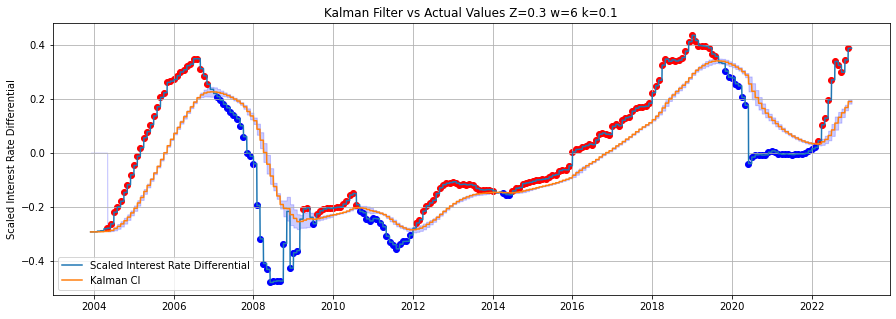

In [80]:
#k=0.1, w=6, z=0.3
data=pd.read_csv('hw2_data.csv', parse_dates = True, index_col = 0)
k=0.1
w=6
z=0.3

data["ir_diff"] = scale(data["I_US"]) - scale(data["I_EU"])
    
data["Filter"] = data.ir_diff.ewm(alpha = k, adjust = False).mean()

# Compute the filter error
data["Filter Error"] = data.ir_diff - data["Filter"]

data["std"] = data["Filter Error"].rolling(w).std()

# create our confidence intervals or "boundaries of inaction"
# these are scaled by the number of standard deviations "z"
data["Upper"] = data["Filter"] + z*data["std"]
data["Lower"] = data["Filter"] - z*data["std"]

# Create signal that evaluates whether we are outside the threshold
# then multiply by the direction of the mistake
# (we use economic theory to decide which direction is long or short)
data["test"] = np.where(data["Filter Error"].abs()>z*data["std"], -1, 0)*np.sign(data["Filter Error"])
    
# Create a dataframe at a daily frequency with start and end 
# dates that cover the observation period
drange = pd.date_range(start =data.index[0], end = "01/01/2023")
daily  = pd.DataFrame(index = drange)

# Integrate the monthly dta into the daily data
daily["test"] = data["test"]

daily["Upper"] = data["Upper"]
daily["Lower"] = data["Lower"]
daily["Filter"] = data["Filter"]
daily["ir_diff"] = data["ir_diff"]

# Fill NA values with the last available value
daily["Upper"] = daily["Upper"].ffill()
daily["Lower"] = daily["Lower"].ffill()
daily["Filter"] = daily["Filter"].ffill()
daily["ir_diff"] = daily["ir_diff"].ffill()

# fill the remaining NA values with 0's
# also populates the test column
daily = daily.fillna(0)
    
data2 = daily.dropna()

fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Scaled Interest Rate Differential")

# Plot the actual series and the filter
ax.plot(data2["ir_diff"])
ax.plot(data2["Filter"])

# This code block is used to add confidence intervals when z > 0
ax.fill_between(data2.index, data2.Lower, data2.Upper, color='b', alpha=.2)

# add scatterplots using boolean indexing
# We change the colors and shapes based on the conditions
ax.scatter(data2[data2.test == 1].index, data2[data2.test == 1]["ir_diff"], color = "blue")
ax.scatter(data2[data2.test == -1].index, data2[data2.test == -1]["ir_diff"], color = "red")
ax.legend(["Scaled Interest Rate Differential", "Kalman CI"])

# this code can let us zoom in on certain time periods
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
ax.grid()


[*********************100%***********************]  1 of 1 completed


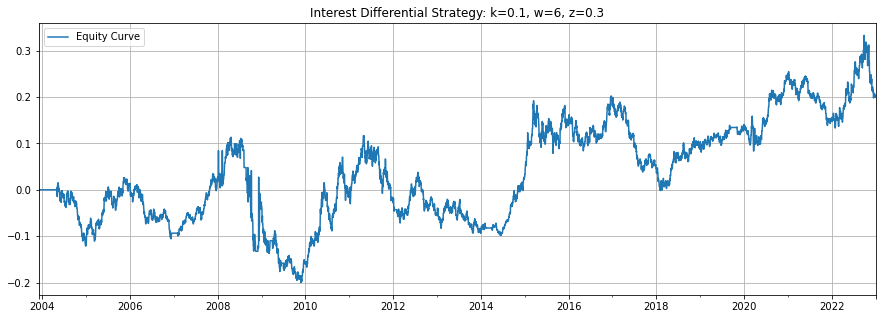

In [81]:
i = 41

# create a new column that we will populate with our daily position
daily.loc[:, str(i)+"_signal"] = 0

# loop through each day in the dataset
for j in daily.index:
    # If our monthly signal is not 0
    if daily.loc[j, "test"] != 0:
        # Make the next i days equal to the monthly signal
        daily.loc[j:j+datetime.timedelta(i), str(i)+"_signal"] = daily.loc[j, "test"]

# below we add the data to the daily df
currency = "EURUSD=X"
exrate = yf.download(currency)[["Adj Close"]].copy()

drange = pd.date_range(start =data.index[0], end = "01/01/2023")
exdf = pd.DataFrame(index = drange)

exrate.index = exrate.index.tz_localize(None)
exdf["EURUSD"] = exrate

exdf["EURUSD"] = exdf["EURUSD"].ffill()

daily["EURUSD"] = exdf["EURUSD"]
daily["Returns"] = np.log(daily["EURUSD"]).diff()

# calculate the cumulative returns for the current strategy
i = 41
daily[str(i)+"_returns"] = np.exp((daily[str(i)+"_signal"].shift()*daily.Returns).cumsum())-1

plt.figure(figsize = (15, 5))
d2 = daily[daily.index.year >= 2020]
(daily["41_returns"].dropna()).plot()

plt.title("Interest Differential Strategy:"+ " k=" + str(k)+", w="+str(w)+", z="+str(z))
plt.legend(["Equity Curve", "Long Success", "Long Fail", "Short Success", "Short Fail"])

plt.grid()
#plt.xlim(["1/1/2019", "1/1/2022"])

In [82]:
start = daily[["EURUSD", '41_returns', "41_signal"]][123:].index[0]

df = daily[daily.test != 0][["41_signal", "EURUSD"]].copy()
df['D'] = df["41_signal"]

df = df[:-2].copy()

df = df[:-2].copy()
df['s_current'] = daily[daily.index.isin(df.index)]["EURUSD"].values
df['s_future'] = daily[daily.index.isin(df.index+datetime.timedelta(41))]["EURUSD"].values


# Get the realized exchange rate
df['R'] = np.where(df['s_future'] >= df['s_current'], 1, -1)

## Sample Covariance
df['W'] = (df['D']-np.mean(df['D']))*(df['R']-np.mean(df['R']))
T_B = np.mean(df['W'])

dy = df['W'] - np.mean(df['W'])
gamma_0 = sum((dy)**2)/len(df)
gamma_1 = np.mean((dy*dy.shift(-1))[:len(df)-1])
LRV = gamma_0 + 2*(1-1/2)*gamma_1

from scipy.stats import norm

statistic = T_B/np.sqrt(LRV/df.shape[0])
print('Test statistic : ', statistic, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  0.2753395617015512 , 5 % critical value :  1.64


In [83]:
# Weighted Mean
df['W_2'] = df['D']*(df['s_future']-df['s_current'])
T_WB = np.mean(df['W_2'])

## Newey-West LRV estimator
dy_2 = df['W_2'] - np.mean(df['W_2'])
gamma_0 = sum((dy_2)**2)/len(df)
gamma_1 = np.mean((dy_2*dy_2.shift(-1))[:len(df)-1])
LRV_2 = gamma_0 + 2*(1-1/2)*gamma_1

## Test-statistic
statistic_2 = T_WB/np.sqrt(LRV_2/len(df))
print('Test statistic : ', statistic_2, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  0.02313549973914423 , 5 % critical value :  1.64


We can see that changing to k=0.1, w=6, z=0.3 can improve the performance of our strategy, but not as good as when k=0.2, w=7, z=0.5. Although the strategy still doesn't pass the two tests, the return is higher.

So changing k,w,z could make great changes on the performance of our strategy, and when k=0.2, w=7, z=0.5, it performs better.

In [11]:
#3.(a)
import scipy.optimize as so
import numpy as np

def YTM(PV,C,k,M,T):
    def ff(y):
        coupon=[]
        for i in np.arange(0,T*k):
            coupon.append((C/k)/pow(1+y,1/k*i+1))
        return np.sum(coupon)+M/pow(1+y,T)-PV
    return so.fsolve(ff,0.1)
Bond_yield=YTM(PV=984.94,C=50,k=1,M=1000,T=10)
print('YTM:',Bond_yield) 

YTM: [0.05196903]


3.(a)YTM is 5.2%.

(b) In this case, the bond pays 50 coupon each period for 10 years and has a face value of 1,000. If the bond does not default, its future cash flows are 50 for each of the 10 years and 1,000 at maturity. If the bond defaults, it will pay nothing. Therefore, the expected cash flows from the bond are:

Expected cash flows = (0.8 * (50 + 50 + ... + 50 + 1,000)) + (0.2 * 0)

The price of the bond can be calculated as the expected present value of these future cash flows, discounted at the risk-free rate of 1%:

Price = 0.8 * (50 * (1 + 1%)^-1 + 50 * (1 + 1%)^-2 + ... + 50 * (1 + 1%)^-10 + 1,000 * (1 + 1%)^-10)

Solving for Price using a financial calculator or spreadsheet software, we find that the price of the bond today is approximately 1103.08.

In [8]:
#4.(a)
F=1000
R=0.15
n=1
r=0.1
T=10

import math
t=T*n                   
C=F*R/n                 
r0=r/n                  
a=math.pow(1+r0,t)      
P=C*(1-1/a)/r0+F/a

i=1                     
j=0                     
while i<=t:
    w=math.pow(1+r0,i)
    DP=C/w              
    U=DP/P              
    N=U*i
    j=j+N              
    i=i+1
v=F/a/P
j1=v*t
J=j1+j
print('Duration of the 10-year bond: ',J)

Duration of the 10-year bond:  6.281090250274965


In [9]:
F=1000
R=0.03
n=1
r=0.03
T=7

import math
t=T*n                   
C=F*R/n                 
r0=r/n                  
a=math.pow(1+r0,t)      
P=C*(1-1/a)/r0+F/a

i=1                     
j=0                     
while i<=t:
    w=math.pow(1+r0,i)
    DP=C/w              
    U=DP/P              
    N=U*i
    j=j+N              
    i=i+1
v=F/a/P
j1=v*t
J=j1+j
print('Duration of the 7-year bond: ',J)

Duration of the 7-year bond:  6.4171914438781865


Therefore, the 10-year bond has a lower duration than the 7-year bond. This means that the price of the 10-year bond is less sensitive to changes in interest rates than the price of the 7-year bond.

(b) When interest rates increase, the price of a bond decreases, and the greater the duration, the greater the decrease in price. So, in this case, we would expect the 7-year bond to experience a greater change in price than the 10-year bond.

(c) To find the duration of a portfolio, we need to calculate the weighted average of the durations of each bond in the portfolio.

The duration of the portfolio would be calculated as follows:
Duration = (0.30 * 6.417) + (0.70 * 6.281) = 6.322 years

So, the duration of the portfolio is 6.322 years, which is between the durations of the two bonds individually.

5.(a)
The main changes between the December 2022 and February 2023 European Central Bank Monetary Policy Decisions are:

-In February 2023, the Governing Council decided to raise the three key ECB interest rates by 50 basis points and expects to raise them further by another 50 basis points in March 2023.

-In December 2022, the Governing Council decided to raise the three key ECB interest rates by 50 basis points and expected to raise them further but did not specify the amount.

-In February 2023, the modalities for reducing the Eurosystem's holdings of securities under the asset purchase program (APP) were decided.

-In December 2022, the Eurosystem discussed principles for normalizing the monetary policy securities holdings.

-In February 2023, partial reinvestments will be conducted and tilted more towards issuers with a better climate performance, supporting the gradual decarbonization of the Eurosystem's corporate bond holdings.

The main changes between the December 2022 and February 2023 Federal Reserve FOMC statements are:

-In February 2023, it says inflation has eased somewhat but remains elevated.

-In December 2022, it says inflation remains elevated, reflecting supply and demand imbalance, relevated to the pandemic, higher food and energy prices, and broader price pressures.

-In February 2023, it says Russia's war against Ukraine is causing tremendous human and economic hardship and is contributing to elevated global uncertainty.

-In December 2022, it says Russia's war against Ukraine is causing tremendous human and economic hardship. The war and related events are contributing to upward pressure on inflation and are weighing on global economic activity.

-In February 2023, it says the Committee decided to raise the target range for the federal funds rate to 4-1/2 to 4-3/4 percent.

-In December 2022, it says the Committee decided to raise the target range for the federal funds rate to 4-1/4 to 4-1/2 percent.

(b) The unexpected shocks or surprises in the February 2023 statements were:

-The European Central Bank raised the interest rates by a larger amount (50 bps) than expected, and announced another potential increase in March 2023.

-The Federal Reserve's statement in February 2023 mentions that Russia's war against Ukraine is contributing to elevated global uncertainty, which was not specified in the December 2022 statement. And it takes off the expression of the war's effect on inflation.

-The Federal Reserve raised the target range for the federal funds rate to 4-1/2 to 4-3/4 percent, which was higher than the range in December 2022.

(c) These surprises likely resulted in the Euro's depreciation as the larger increase in European interest rates and the uncertainty caused by the war in Ukraine increased the attractiveness of the US dollar, causing investors to shift their investments from the Euro to the US dollar, leading to a decrease in demand for the Euro and a corresponding depreciation. Additionally, the higher target range for the federal funds rate in the US may have also made the US dollar more attractive to investors.

6.(a) To prevent further inflation, the Federal Reserve can consider the following actions and communication:

Increase transparency: The Federal Reserve can clearly communicate its monetary policy plans and the reasoning behind its decisions to help market participants understand its position and outlook.

Provide regular updates: The Federal Reserve can hold regular press conferences, release minutes from its meetings, and publish economic projections to help the market understand its thinking and actions.

Consistency in policy actions: Consistency in policy actions, with clear and credible communication, can help to reduce the volatility in financial markets and build trust among market participants.

Address market expectations: The Federal Reserve can closely monitor market expectations and address any misunderstandings, as if investors are anticipating faster rate cuts, it could force the Fed to raise rates more than it otherwise would.

Address declining financial conditions: The Federal Reserve can closely monitor the declining financial conditions, which could lead to a reacceleration in economic activity, and take steps to address any potential inflationary pressures.

Take a gradual approach to tightening: The Federal Reserve should consider a gradual approach to tightening monetary policy, rather than making sharp increases in interest rates, to minimize the risk of a sudden slowdown in the economy.

These actions can help the Federal Reserve effectively manage inflation expectations, build trust and reduce volatility in financial markets, ultimately helping to maintain stability in the economy.